In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.covariance import empirical_covariance

In [34]:
accuracy = pd.DataFrame(
    [[0.794,  0.848667, 0.8534 , 0.870133, 0.87332, 0.875629 , 0.876286],
     [0.820, 0.840667, 0.8550, 0.871800, 0.87592, 0.879686, 0.881405],
     [0.825, 0.837667, 0.8544, 0.871400, 0.87540, 0.879400, 0.881190],
     [0.822, 0.840667, 0.8528, 0.870333, 0.87508, 0.879657, 0.881071]],
    index=['k=1, alfa=31', 'k=3, alfa=34', 'k=5, alfa=40', 'k=7, alfa=31'],
    columns=[1000, 3000, 5000, 15000, 25000, 35000, 42000]
)

recall = pd.DataFrame(
    [[0.793149, 0.842868, 0.846647 , 0.867374, 0.873149, 0.874915 , 0.875802],
     [0.822185, 0.845402, 0.860558, 0.871935, 0.876011, 0.878550, 0.880952],
     [0.827731, 0.842144, 0.859955, 0.871427, 0.875451, 0.878207, 0.880687],
     [0.824439, 0.845695, 0.858407, 0.870422, 0.875181, 0.878518, 0.880645]],
    index=['k=1, alfa=31', 'k=3, alfa=34', 'k=5, alfa=40', 'k=7, alfa=31'],
    columns=[1000, 3000, 5000, 15000, 25000, 35000, 42000]
)

In [35]:
def style_specific_cell(x):
    #lo hice a ojo xq soy una rancia xd
    color = 'background-color: violet'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[2, 0] = color
    df1.iloc[3, 1] = color
    df1.iloc[1, 2] = color
    df1.iloc[1, 3] = color
    df1.iloc[1, 4] = color
    df1.iloc[1, 5] = color
    df1.iloc[1, 6] = color
    return df1

#accuracy.style.apply(style_specific_cell, axis=None)
recall.style.apply(style_specific_cell, axis=None)

,1000,3000,5000,15000,25000,35000,42000
"k=1, alfa=31",0.793149,0.842868,0.846647,0.867374,0.873149,0.874915,0.875802
"k=3, alfa=34",0.822185,0.845402,0.860558,0.871935,0.876011,0.878550,0.880952
"k=5, alfa=40",0.827731,0.842144,0.859955,0.871427,0.875451,0.878207,0.880687
"k=7, alfa=31",0.824439,0.845695,0.858407,0.870422,0.875181,0.878518,0.880645


In [36]:
df.to_csv("csvs/k-alfa_vs_n.csv")

NameError: name 'df' is not defined

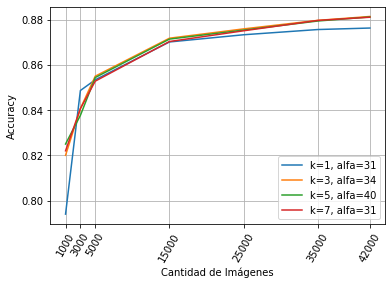

In [37]:
sns.lineplot(x=accuracy.columns, y=accuracy.loc['k=1, alfa=31',:])
sns.lineplot(x=accuracy.columns, y=accuracy.loc['k=3, alfa=34',:])
sns.lineplot(x=accuracy.columns, y=accuracy.loc['k=5, alfa=40',:])
sns.lineplot(x=accuracy.columns, y=accuracy.loc['k=7, alfa=31',:])
#plt.title("Accuracy de pares k,alfa vs cantidad de imágenes")
plt.ylabel("Accuracy")
plt.xlabel("Cantidad de Imágenes")
plt.xticks(accuracy.columns, rotation=60)
plt.legend(accuracy.index)
plt.savefig('mejorCombinacionTodosAccuracy.png')
plt.grid()

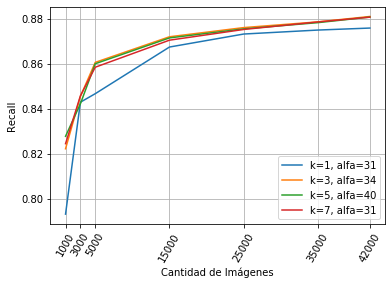

In [38]:
sns.lineplot(x=recall.columns, y=recall.loc['k=1, alfa=31',:])
sns.lineplot(x=recall.columns, y=recall.loc['k=3, alfa=34',:])
sns.lineplot(x=recall.columns, y=recall.loc['k=5, alfa=40',:])
sns.lineplot(x=recall.columns, y=recall.loc['k=7, alfa=31',:])
#plt.title("Accuracy de pares k,alfa vs cantidad de imágenes")
plt.ylabel("Recall")
plt.xlabel("Cantidad de Imágenes")
plt.xticks(recall.columns, rotation=60)
plt.legend(recall.index)
plt.savefig('mejorCombinacionTodosRecall.png')
plt.grid()

In [33]:
idx = [1,3,5,7]
for n in df.columns:
    sns.lineplot(x=idx, y=df.loc[:,n])
plt.title("Accuracy de cantidad de imágenes vs pares de k,alfa")
plt.ylabel("Accuracy")
plt.xlabel("Pares k,alfa")
plt.legend(["n={}".format(n) for n in df.columns])
plt.xticks(ticks=idx, labels=df.index)
plt.grid()

("n={}".format(n) for n in df.columns)

NameError: name 'df' is not defined

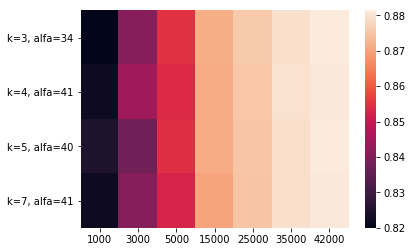

In [7]:
sns.heatmap(df)

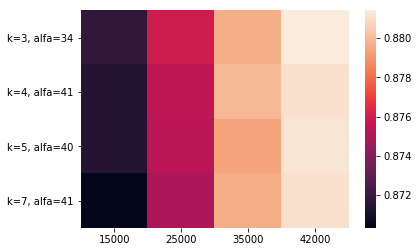

In [8]:
sns.heatmap(df.loc[:,15000:])

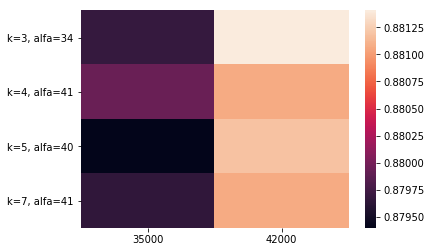

In [9]:
sns.heatmap(df.loc[:,35000:])

In [10]:
df.to_numpy()

array([[0.82    , 0.840667, 0.855   , 0.8718  , 0.87592 , 0.879686,
        0.881405],
       [0.822   , 0.844   , 0.8538  , 0.8714  , 0.87556 , 0.879943,
        0.881071],
       [0.825   , 0.837667, 0.8544  , 0.8714  , 0.8754  , 0.8794  ,
        0.88119 ],
       [0.822   , 0.840667, 0.8528  , 0.870333, 0.87508 , 0.879657,
        0.881071]])

In [11]:
M = empirical_covariance(df.to_numpy())

In [12]:
M

array([[ 3.18750000e-06, -2.27081250e-06, -2.00000000e-07,
        -1.58312500e-07, -2.82500000e-07, -2.10875000e-07,
        -1.06062500e-07],
       [-2.27081250e-06,  5.02029169e-06, -4.66650000e-07,
         1.38819375e-08,  1.25827500e-07,  4.29852375e-07,
        -9.86780625e-08],
       [-2.00000000e-07, -4.66650000e-07,  6.60000000e-07,
         4.20100000e-07,  2.18000000e-07, -3.27500000e-08,
         9.54000000e-08],
       [-1.58312500e-07,  1.38819375e-08,  4.20100000e-07,
         2.96816687e-07,  1.52367500e-07,  5.31787500e-09,
         5.22844375e-08],
       [-2.82500000e-07,  1.25827500e-07,  2.18000000e-07,
         1.52367500e-07,  9.15000000e-08,  1.39050000e-08,
         3.32275000e-08],
       [-2.10875000e-07,  4.29852375e-07, -3.27500000e-08,
         5.31787500e-09,  1.39050000e-08,  3.69612500e-08,
        -6.86637500e-09],
       [-1.06062500e-07, -9.86780625e-08,  9.54000000e-08,
         5.22844375e-08,  3.32275000e-08, -6.86637500e-09,
         1.8603687

In [13]:
np.mean(M)

9.724464668367028e-08

In [14]:
np.std(M)

9.848635669535624e-07

In [15]:
np.max(M)

5.020291687499873e-06

In [16]:
#test = df.loc['k=3, alfa=34',:]
test = pd.DataFrame(
    [[7, 8, 9],
#     [6, 7, 8]]
     [7, 8, 9]]
)
test

,0,1,2
0,7,8,9
1,7,8,9


In [17]:
testM = empirical_covariance(test)
testM

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [18]:
print("max: {}".format(np.max(testM)))
print("mean: {}".format(np.mean(testM)))
print("std: {}".format(np.std(testM)))

max: 0.0
mean: 0.0
std: 0.0


In [19]:
cov_mat = pd.DataFrame(
    M,
#    index=['k=3, alfa=34', 'k=4, alfa=41', 'k=5, alfa=40', 'k=7, alfa=41'],
#    columns=[1000, 3000, 5000, 15000, 25000, 35000, 42000]
)

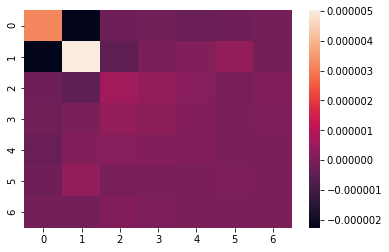

In [20]:
sns.heatmap(M)